In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.datasets import fashion_mnist
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
def main():
    (x_train_full, y_train_full), (x_test, y_test) = fashion_mnist.load_data()

    x_valid, x_train = x_train_full[:5000] / 255., x_train_full[5000:] / 255.
    y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
    x_test = x_test / 255.

    model = Sequential([
            Flatten(input_shape=[28, 28]),
            Dense(300, activation="relu"),
            Dense(100, activation="relu"),
            Dense(10, activation="softmax")
    ])
    print(model.summary())
    model.compile(loss="sparse_categorical_crossentropy",
                  optimizer="adam",
                  metrics=["acc"])

    history = model.fit(x_train, y_train,
                        epochs=50,
                        validation_data=(x_valid, y_valid))

    pd.DataFrame(history.history).plot()
    plt.grid(True)
    plt.show()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_11 (Dense)            (None, 300)               235500    
                                                                 
 dense_12 (Dense)            (None, 100)               30100     
                                                                 
 dense_13 (Dense)            (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/50
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4870 - acc: 0.8269 - val_loss: 0.3981 - val_acc: 0.8534
Epoch 2/50
1719/1719 [===================

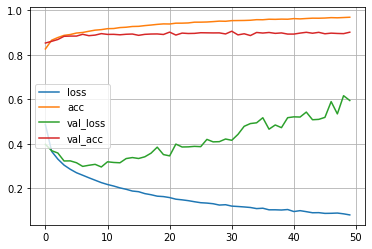

In [15]:
main()